In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option("display.max_rows", 1000)

In [2]:
PATH_DATA = '/Users/clintoninnes/Desktop/pricelogs_20241128.csv'

df = pd.read_csv(PATH_DATA)

In [5]:
df.head(3)

,Unnamed: 0,1INCHEUR_from_kraken,1INCHUSD_from_kraken,AAVEETH_from_kraken,AAVEEUR_from_kraken,AAVEGBP_from_kraken,AAVEUSD_from_kraken,AAVEXBT_from_kraken,ACAEUR_from_kraken,ACAUSD_from_kraken,ACHEUR_from_kraken,ACHUSD_from_kraken,ADAAUD_from_kraken,ADAETH_from_kraken,ADAEUR_from_kraken,ADAGBP_from_kraken,ADAUSD_from_kraken,ADAUSDT_from_kraken,ADAXBT_from_kraken,ADXEUR_from_kraken,ADXUSD_from_kraken,AEVOEUR_from_kraken,AEVOUSD_from_kraken,AGLDEUR_from_kraken,AGLDUSD_from_kraken,AIREUR_from_kraken,AIRUSD_from_kraken,AKTEUR_from_kraken,AKTUSD_from_kraken,ALCXEUR_from_kraken,ALCXUSD_from_kraken,ALGOETH_from_kraken,ALGOEUR_from_kraken,ALGOGBP_from_kraken,ALGOUSD_from_kraken,ALGOUSDT_from_kraken,ALGOXBT_from_kraken,ALICEEUR_from_kraken,ALICEUSD_from_kraken,ALPHAEUR_from_kraken,ALPHAUSD_from_kraken,ALTEUR_from_kraken,ALTUSD_from_kraken,AMPEUR_from_kraken,AMPUSD_from_kraken,ANKREUR_from_kraken,ANKRUSD_from_kraken,ANKRXBT_from_kraken,APEEUR_from_kraken,APEUSD_from_kraken,...,1INCH-GBP_from_coin,CHZ-GBP_from_coin,GMT-USDT_from_coin,PAX-USDC_from_coin,PAX-USD_from_coin,CBETH-ETH_from_coin,SOL-ETH_from_coin,ETH-BTC_from_coin,WBTC-BTC_from_coin,DOGE-BTC_from_coin,ADA-ETH_from_coin,LSETH-ETH_from_coin,LINK-ETH_from_coin,XLM-BTC_from_coin,LTC-BTC_from_coin,SOL-BTC_from_coin,ADA-BTC_from_coin,AVAX-BTC_from_coin,UNI-BTC_from_coin,BCH-BTC_from_coin,AAVE-BTC_from_coin,MANA-ETH_from_coin,LINK-BTC_from_coin,ETC-BTC_from_coin,GRT-BTC_from_coin,DOT-BTC_from_coin,ALGO-BTC_from_coin,BAT-BTC_from_coin,XTZ-BTC_from_coin,FIL-BTC_from_coin,BAT-ETH_from_coin,COMP-BTC_from_coin,ATOM-BTC_from_coin,CRV-BTC_from_coin,ZEC-BTC_from_coin,MKR-BTC_from_coin,EOS-BTC_from_coin,ICP-BTC_from_coin,LRC-BTC_from_coin,MATIC-BTC_from_coin,DASH-BTC_from_coin,ANKR-BTC_from_coin,MANA-BTC_from_coin,CGLD-BTC_from_coin,SNX-BTC_from_coin,AXS-BTC_from_coin,BAL-BTC_from_coin,YFI-BTC_from_coin,1INCH-BTC_from_coin,logging_time_from_coin
0,0,0.4050,0.4285,0.05645,196.150,163.47,207.415,0.002159,0.0905,0.096,0.027970,0.029565,1.552280,0.000275,0.956300,0.797115,1.009953,1.009730,0.000011,0.182185,0.19392,0.44745,0.47275,1.30535,1.3793,0.015515,0.016120,3.8967,4.11145,21.810,23.065,0.00008,0.277455,0.23122,0.293175,0.292915,0.000003,1.3895,1.4690,0.092695,0.098010,0.1341,0.14170,0.0,0.0,0.040295,0.042585,4.430000e-07,1.24490,1.31595,...,0.335,0.0741,0.2067,0.9996,0.9996,1.08451,0.06603,0.03822,0.9997,0.000004,0.000274,1.05833,0.005128,0.000005,0.001017,0.002523,0.00001,0.000456,0.000139,0.005427,0.002159,0.000165,0.000196,0.000341,0.000003,0.000088,0.000003,0.000003,0.000013,0.000061,0.000081,0.000755,0.000086,0.000005,0.000576,0.01948,0.000009,0.000121,0.000002,0.000006,0.000399,4.400000e-07,0.000006,0.000009,0.000025,0.000081,0.000029,0.0785,0.000004,27/11/2024 18:27:41
1,0,0.4060,0.4295,0.05640,195.925,163.27,207.075,0.002157,0.0905,0.096,0.027965,0.029555,1.552925,0.000275,0.956363,0.797025,1.010350,1.009926,0.000011,0.182185,0.19392,0.44705,0.47265,1.30585,1.3796,0.015595,0.016195,3.8962,4.11080,21.815,23.070,0.00008,0.277505,0.23127,0.293255,0.292975,0.000003,1.3885,1.4675,0.092720,0.098040,0.1341,0.14165,0.0,0.0,0.040280,0.042570,4.430000e-07,1.24460,1.31545,...,0.335,0.0741,0.2067,0.9996,0.9996,1.08451,0.06603,0.03822,0.9997,0.000004,0.000274,1.05833,0.005128,0.000005,0.001017,0.002523,0.00001,0.000456,0.000139,0.005427,0.002159,0.000165,0.000196,0.000341,0.000003,0.000088,0.000003,0.000003,0.000013,0.000061,0.000081,0.000755,0.000086,0.000005,0.000576,0.01948,0.000009,0.000121,0.000002,0.000006,0.000399,4.400000e-07,0.000006,0.000009,0.000025,0.000081,0.000029,0.0785,0.000004,27/11/2024 18:27:56
2,0,0.4065,0.4295,0.05640,196.010,163.34,207.180,0.002158,0.0905,0.096,0.027985,0.029570,1.552630,0.000275,0.956076,0.796765,1.010247,1.009618,0.000011,0.182215,0.19392,0.44710,0.47260,1.30590,1.3803,0.015615,0.016205,3.8984,4.11375,21.815,23.070,0.00008,0.277505,0.23130,0.293255,0.292975,0.000003,1.3875,1.4675,0.092750,0.098055,0.1340,0.14160,0.0,0.0,0.040275,0.042570,4.430000e-07,1.244

In [7]:
columns_keep = df.columns[(df.dtypes == 'float64')]

kraken_col = [col for col in columns_keep if 'kraken' in col]
coin_cols = [col for col in columns_keep if ('kraken' not in col)]



In [9]:
correlations = df[columns_keep].corr()

In [10]:
display(pd.DataFrame(correlations.isnull().mean().value_counts()))

,count
0.065189,1434
1.000000,100


In [11]:
correlations[correlations['1INCHEUR_from_kraken'].notnull()]['1INCHEUR_from_kraken'].sort_values().reset_index()

,index,1INCHEUR_from_kraken
0,CLOUDEUR_from_kraken,-0.899921
1,XXMRXXBT_from_kraken,-0.807386
2,PAXGXBT_from_kraken,-0.805287
3,SGBEUR_from_kraken,-0.805071
4,SGBUSD_from_kraken,-0.803148
...,...,...
1429,TUSD_from_kraken,0.967767
1430,1INCH-USD_from_coin,0.977202
1431,1INCH-USDC_from_coin,0.977202
1432,1INCHUSD_from_kraken,0.995352


In [12]:
mapper = {}

for col in correlations:
    if 'kraken' not in col:
        sorted_cor = correlations[correlations[col].notnull()][col].sort_values().reset_index()
        mapper[col] = sorted_cor[sorted_cor['index'].map(lambda x: 'kraken' in x)]['index'].iloc[-1]

In [13]:
mapper

{'BTC-USD_from_coin': 'XBTUSDC_from_kraken',
 'BTC-USDC_from_coin': 'XBTUSDC_from_kraken',
 'ETH-USD_from_coin': 'XETHZUSD_from_kraken',
 'ETH-USDC_from_coin': 'XETHZUSD_from_kraken',
 'USDT-USD_from_coin': 'USDTZUSD_from_kraken',
 'XLM-USD_from_coin': 'XXLMZUSD_from_kraken',
 'XLM-USDC_from_coin': 'XXLMZUSD_from_kraken',
 'XRP-USD_from_coin': 'XXRPZUSD_from_kraken',
 'XRP-USDC_from_coin': 'XXRPZUSD_from_kraken',
 'DOGE-USDC_from_coin': 'XDGUSDT_from_kraken',
 'DOGE-USD_from_coin': 'XDGUSDT_from_kraken',
 'SOL-USD_from_coin': 'SOLUSDT_from_kraken',
 'SOL-USDC_from_coin': 'SOLUSDT_from_kraken',
 'USDT-USDC_from_coin': 'USDTZUSD_from_kraken',
 'SUI-USDC_from_coin': 'SUIUSD_from_kraken',
 'SUI-USD_from_coin': 'SUIUSD_from_kraken',
 'ADA-USDC_from_coin': 'ADAUSD_from_kraken',
 'ADA-USD_from_coin': 'ADAUSD_from_kraken',
 'BONK-USDC_from_coin': 'BONKUSD_from_kraken',
 'BONK-USD_from_coin': 'BONKUSD_from_kraken',
 'BTC-USDT_from_coin': 'XBTUSDT_from_kraken',
 'BTC-EUR_from_coin': 'XXBTZEUR_fr

In [21]:
if False:
    for key, value in mapper.items():
        filterr = (correlations.index == value)  
        print(correlations[filterr][key])
        print('\n')

In [66]:
dff = pd.DataFrame({'matched_coinbase':[],'matched_kraken':[], 'cases_over2_pec':[]})
for key, value in mapper.items():
    filterr = (correlations.index == value) 
    if  (correlations[filterr][key].iloc[0] > 0.9):
        big_diff = (((df[key] - df[value])/df[value]) > 0.015).mean()
        summary = pd.DataFrame({'matched_coinbase':[key],'matched_kraken':[value], 'cases_over2_pec':[big_diff]})
        dff = pd.concat([dff,summary]) 
        
dff = dff.sort_values(by='cases_over2_pec', ascending=False)   

In [68]:
dff

,matched_coinbase,matched_kraken,cases_over2_pec
0,FORTH-USDC_from_coin,MINAEUR_from_kraken,1.000000
0,ABT-USDC_from_coin,USDCUSDT_from_kraken,1.000000
0,CBETH-USD_from_coin,ETHUSDC_from_kraken,1.000000
0,CBETH-USDC_from_coin,ETHUSDC_from_kraken,1.000000
0,BOBA-USD_from_coin,BOBAEUR_from_kraken,1.000000
0,BOBA-USDC_from_coin,BOBAEUR_from_kraken,1.000000
0,AVT-USD_from_coin,SGBEUR_from_kraken,1.000000
0,AVT-USDC_from_coin,SGBEUR_from_kraken,1.000000
0,ABT-USD_from_coin,USDCUSDT_from_kraken,1.000000
0,DAR-USD_from_coin,OGNUSD_from_kraken,1.000000


/var/folders/jw/yf79v1_x58jdt47gvv5x92x00000gn/T/ipykernel_26597/1029286797.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


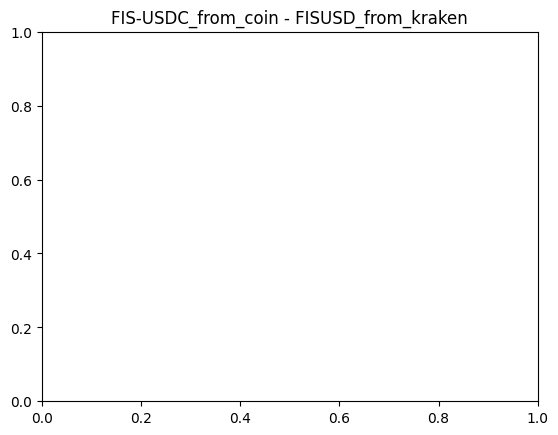

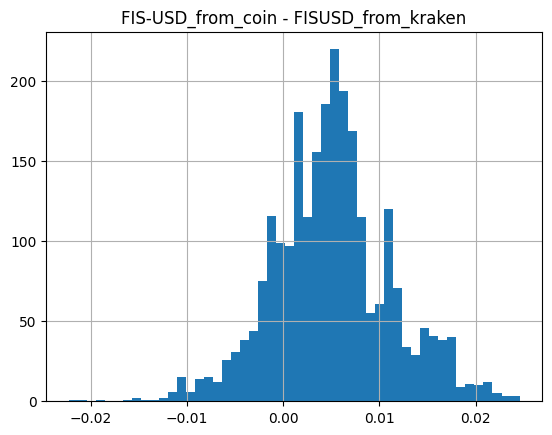

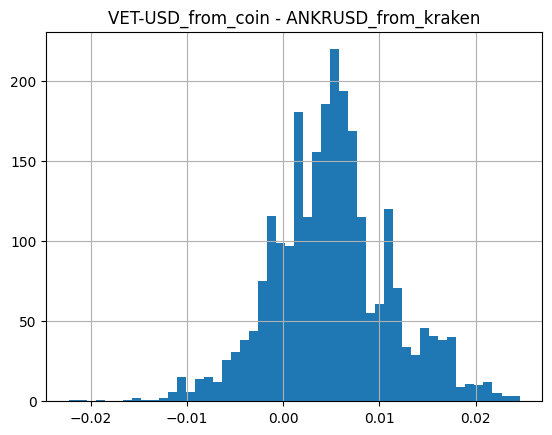

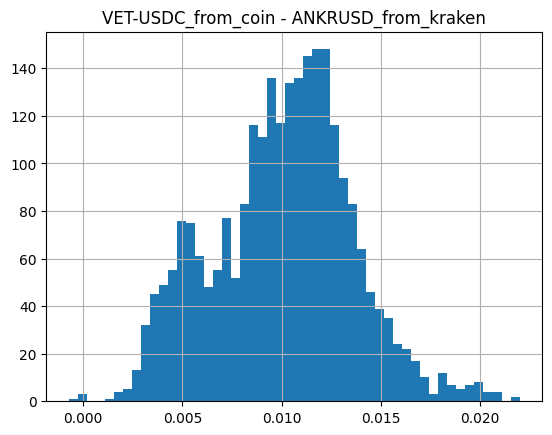

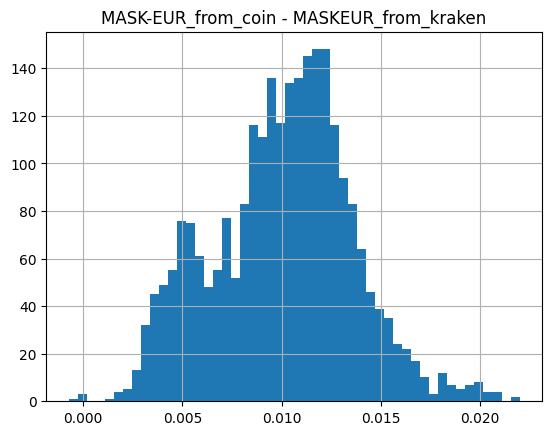

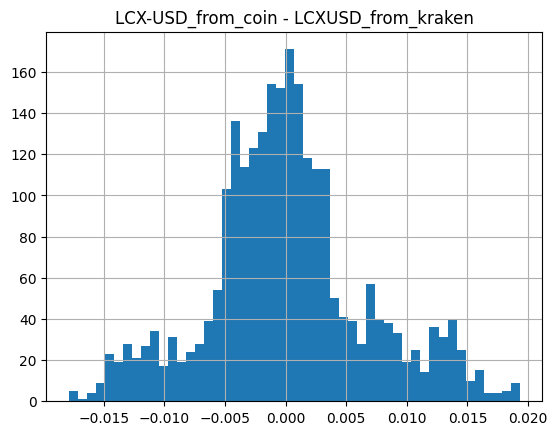

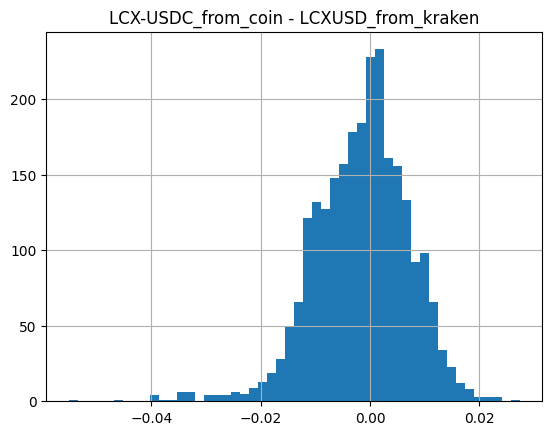

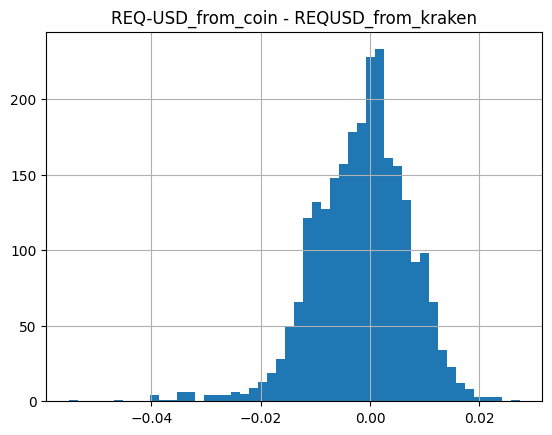

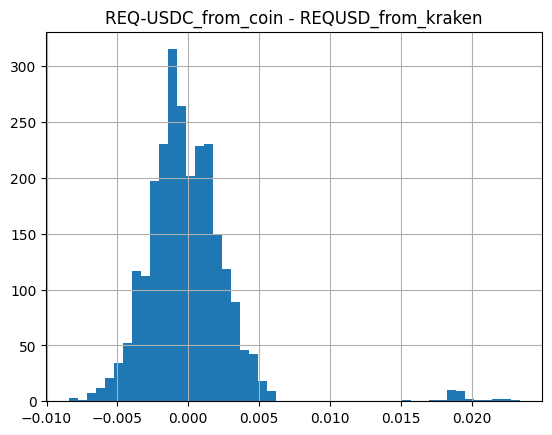

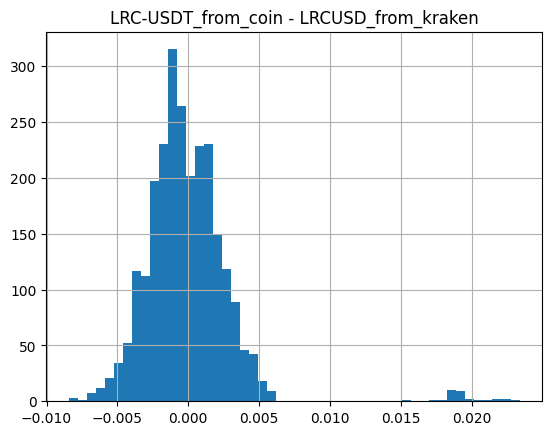

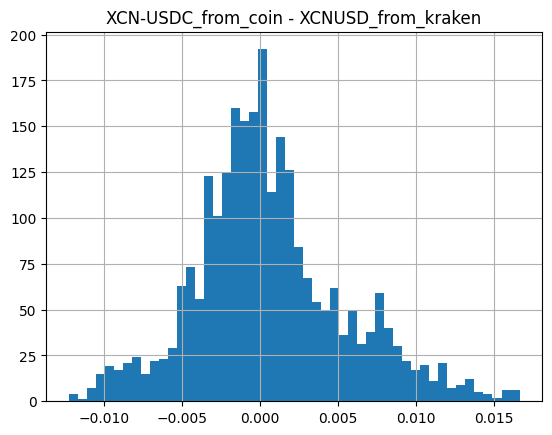

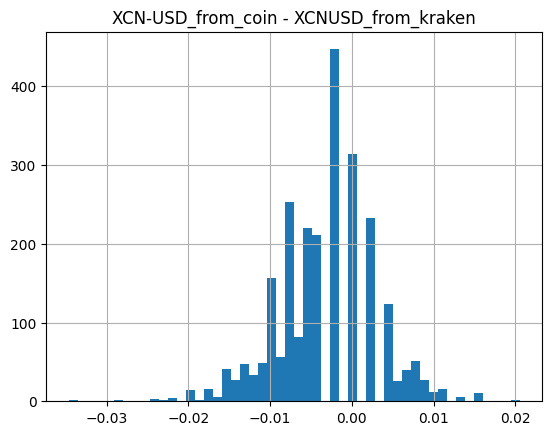

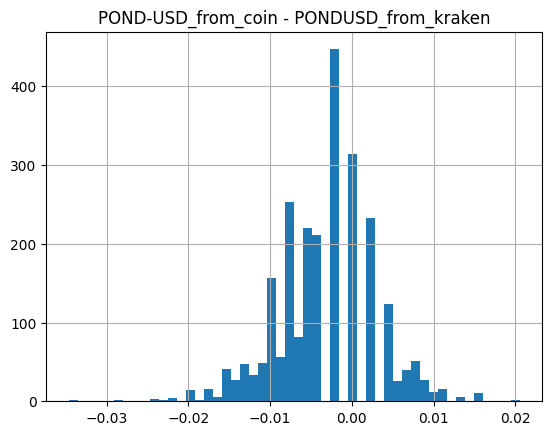

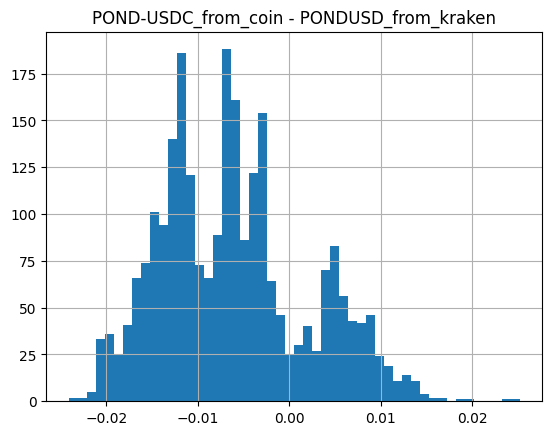

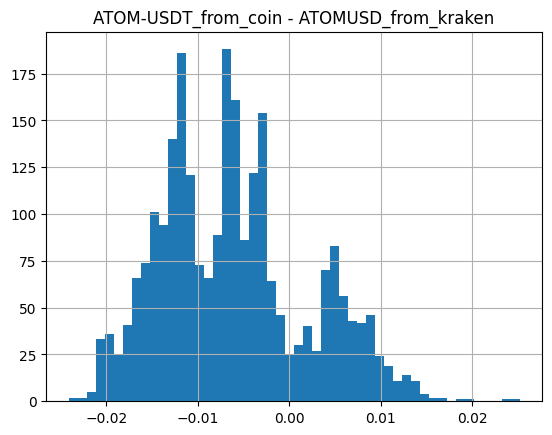

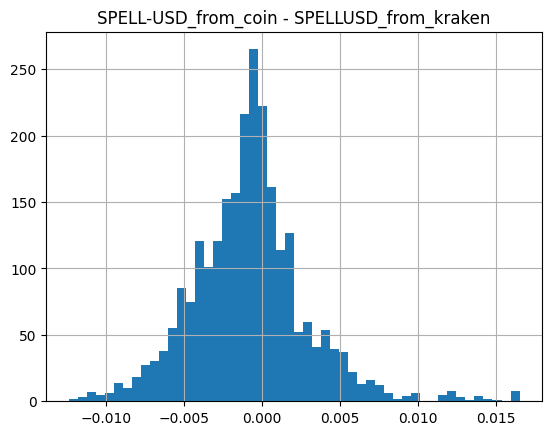

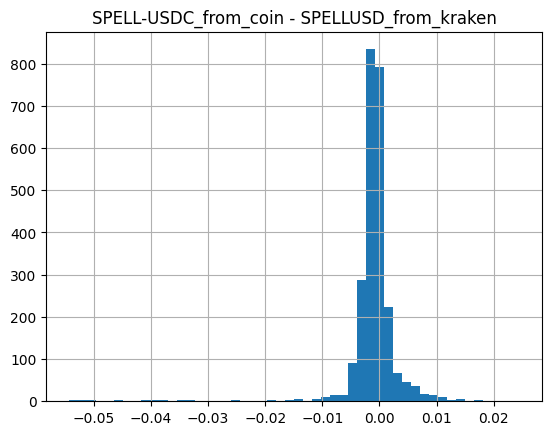

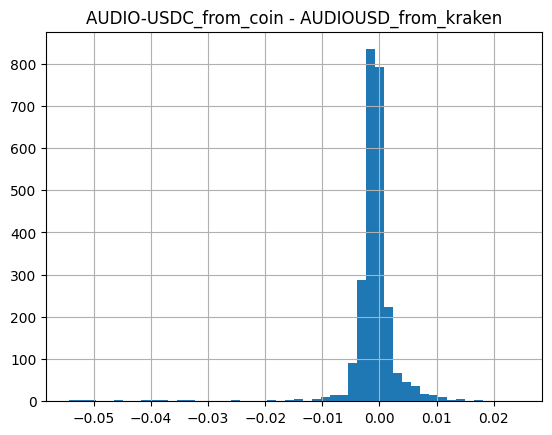

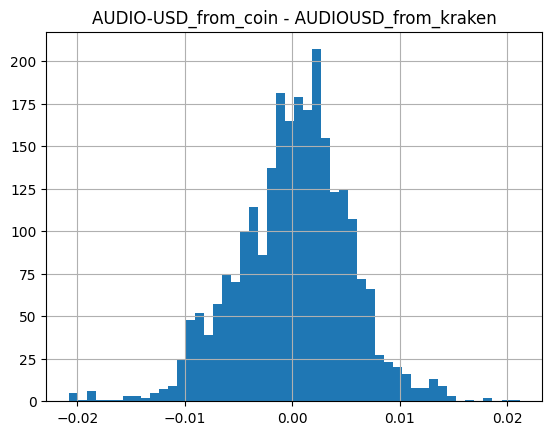

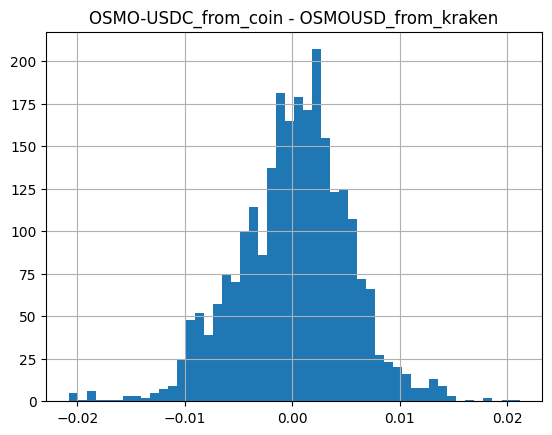

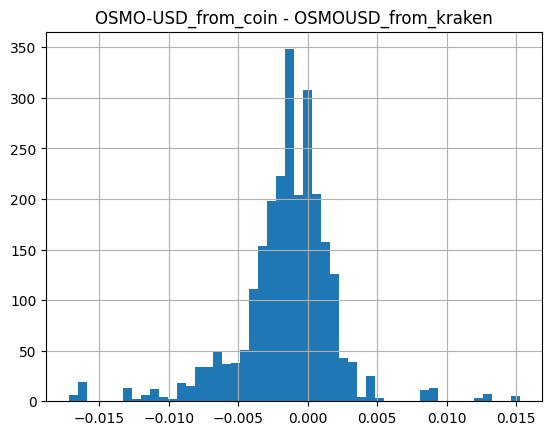

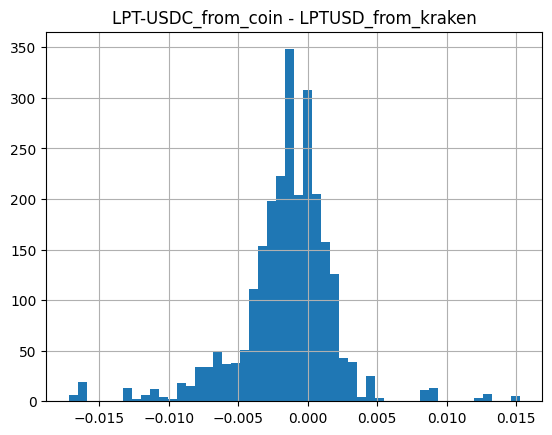

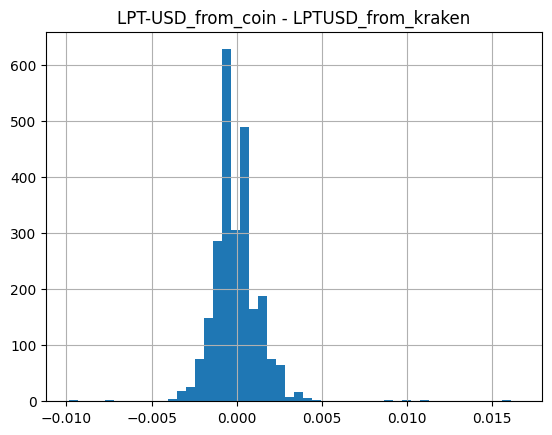

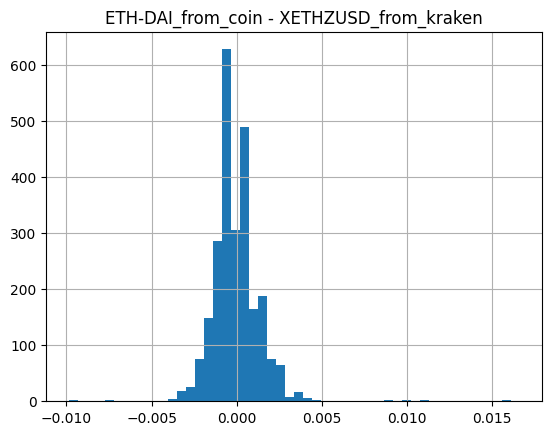

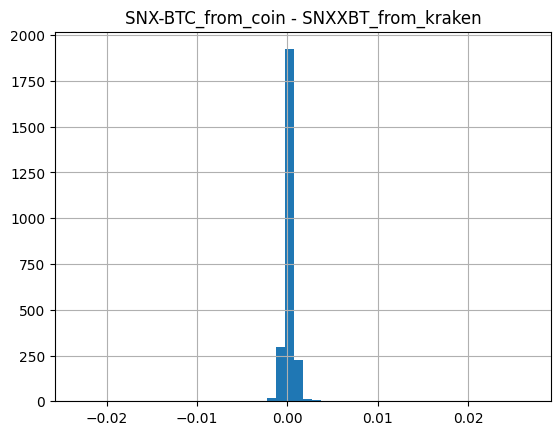

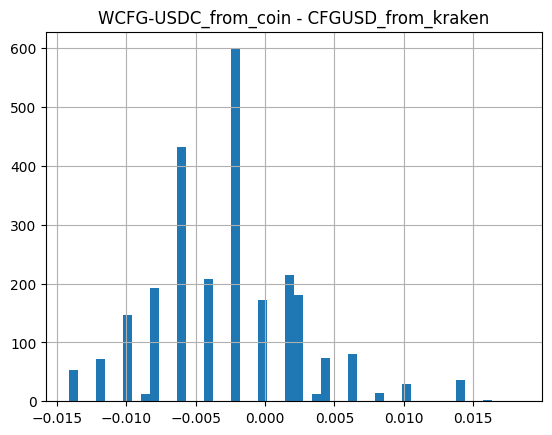

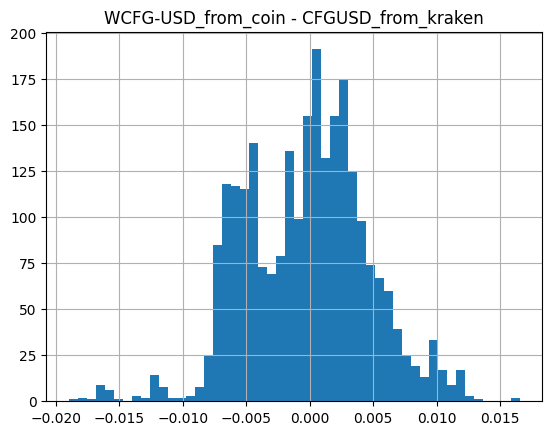

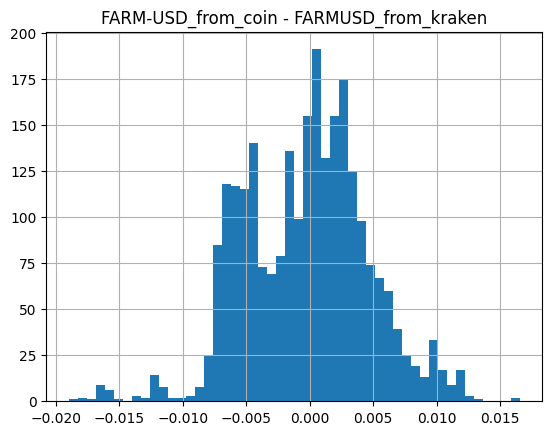

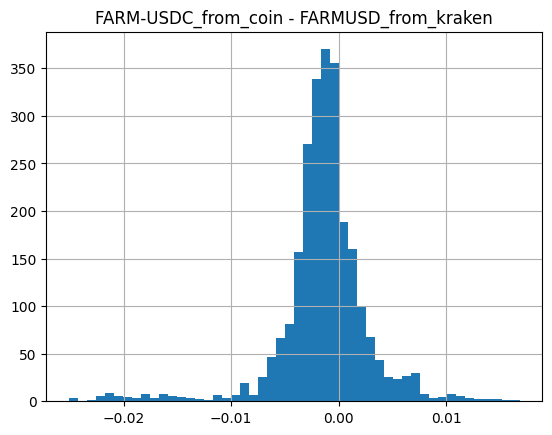

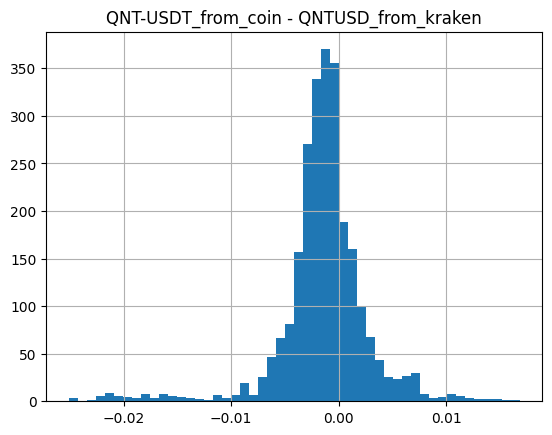

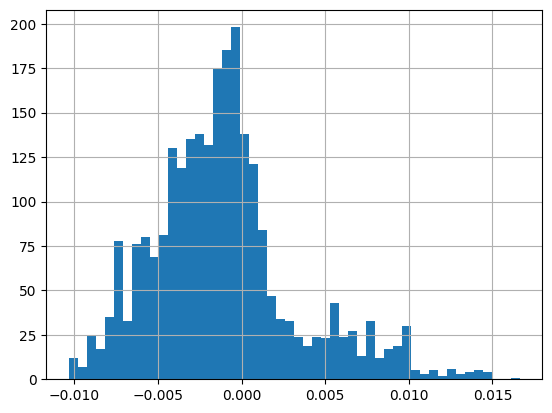

In [70]:
import matplotlib.pyplot as plt
for index, row in dff[(dff['cases_over2_pec'] >0)  & (dff['cases_over2_pec'] <0.1) ].iterrows():

    coinbase = row['matched_coinbase'] 
    kraken = row['matched_kraken']
    plt.title(f'{coinbase} - {kraken}')
    plt.figure()
    ((df[coinbase] - df[kraken])/df[kraken]).hist(bins=50)
    

In [62]:
[col for col in df.columns if 'audio' in col.lower()]

['AUDIOEUR_from_kraken',
 'AUDIOUSD_from_kraken',
 'AUDIO-USD_from_coin',
 'AUDIO-USDC_from_coin']